In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("Numerical Features:",numerical_features)
print("Categorical Features:",categorical_features)


Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [13]:
df['total_score']=df['math score']+df['reading score']+df['writing score'] 
df['average_score']=df['total_score']/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


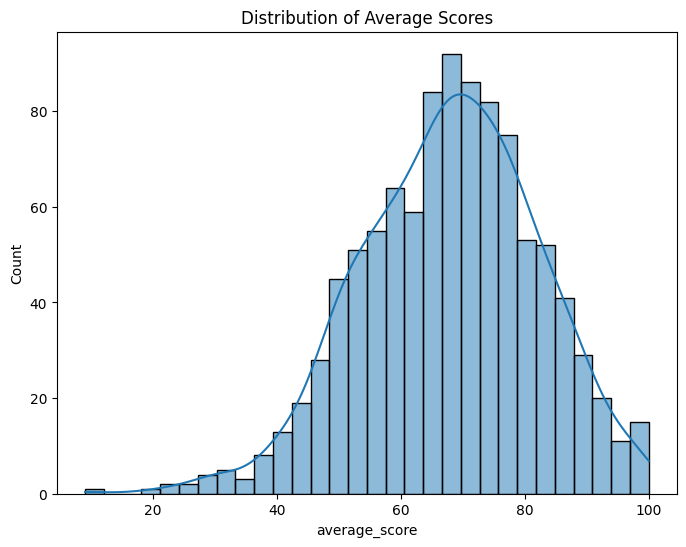

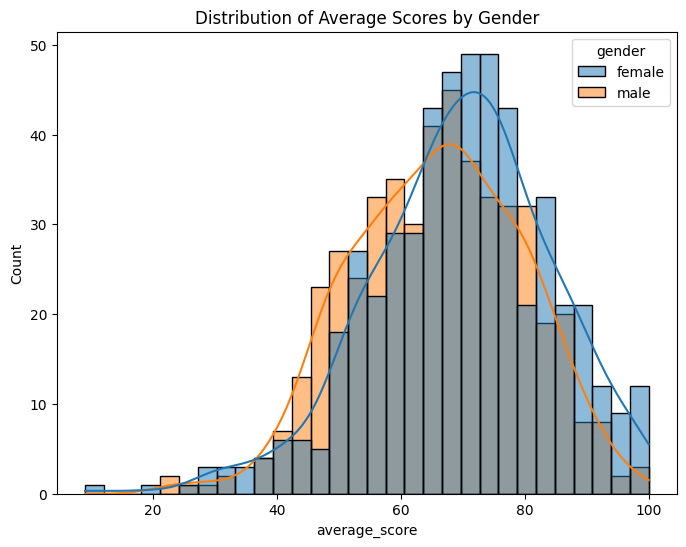

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='average_score',bins=30,kde=True)
plt.title("Distribution of Average Scores")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='average_score',kde=True,hue='gender',bins=30)
plt.title("Distribution of Average Scores by Gender")
plt.show()

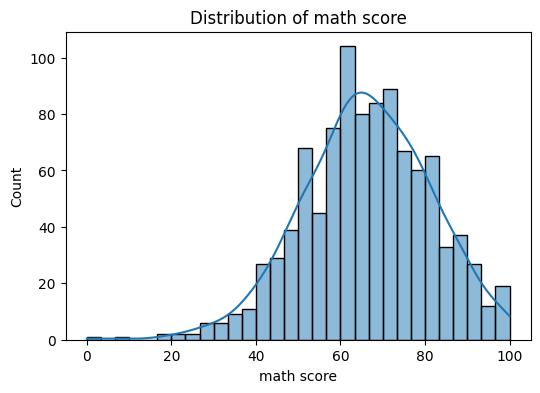

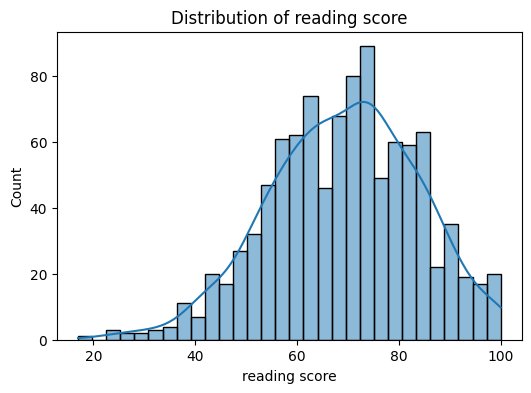

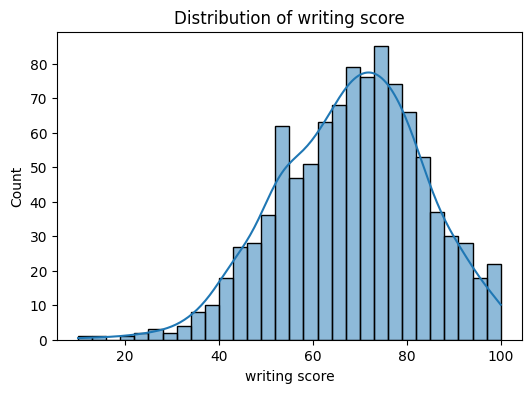

In [16]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


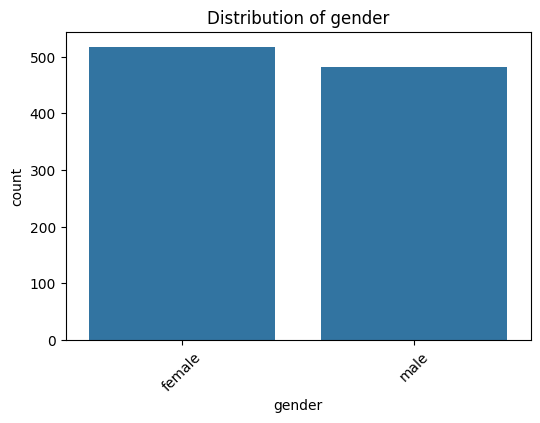

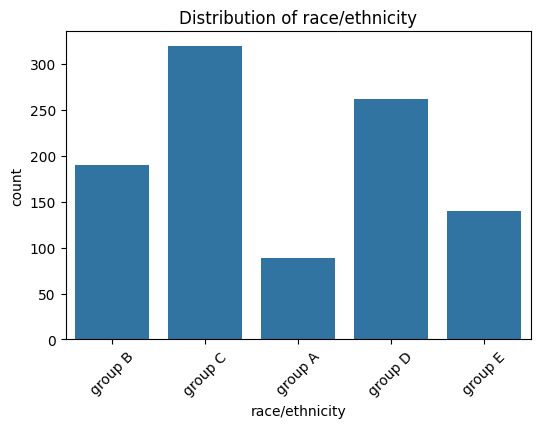

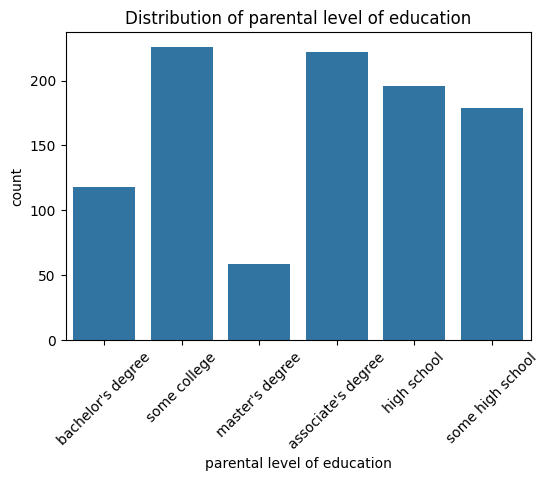

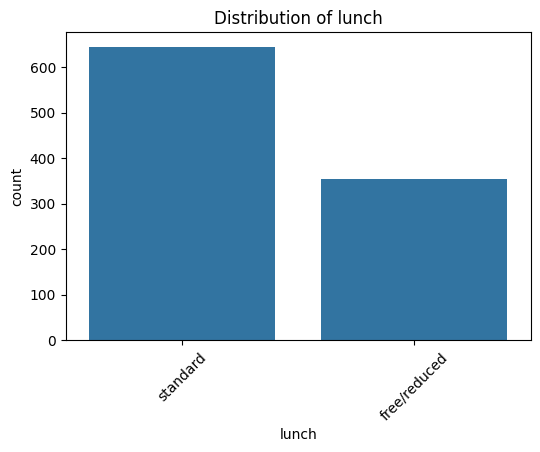

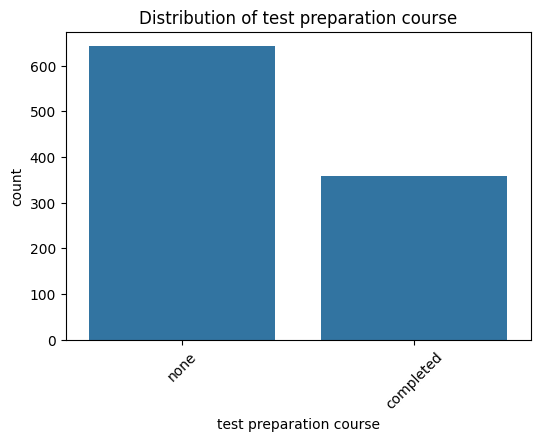

In [17]:
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

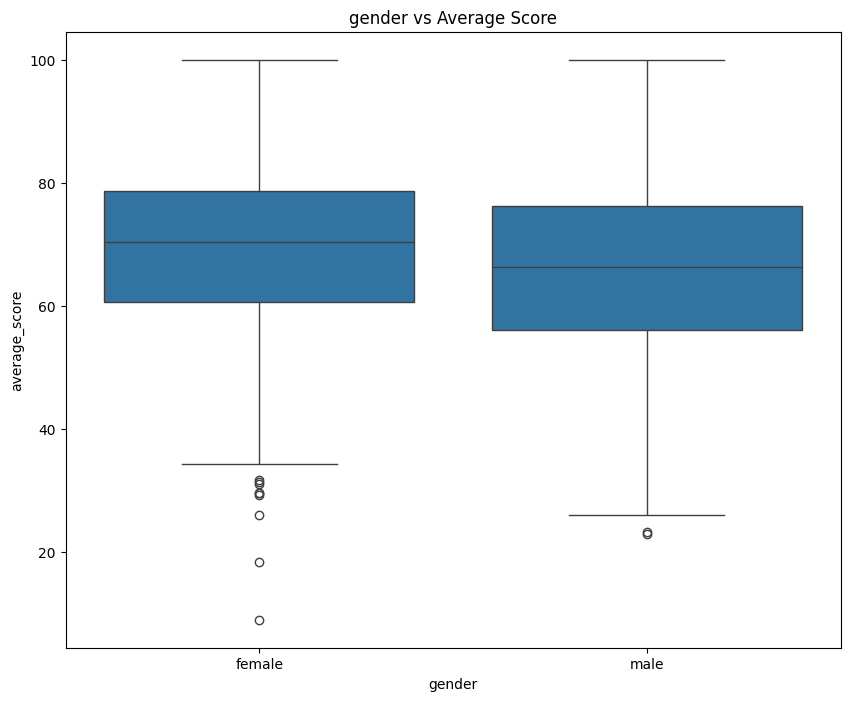

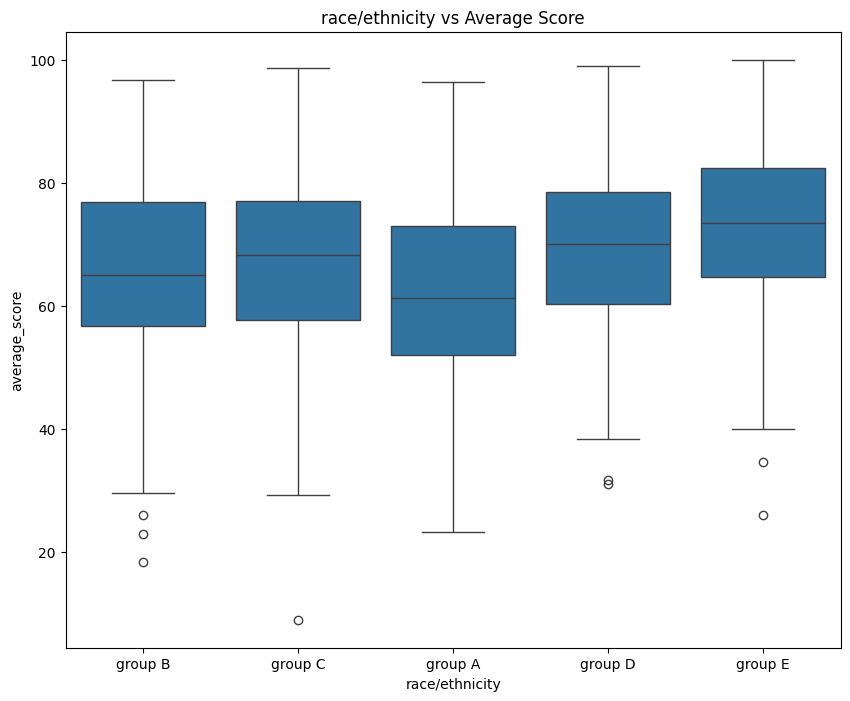

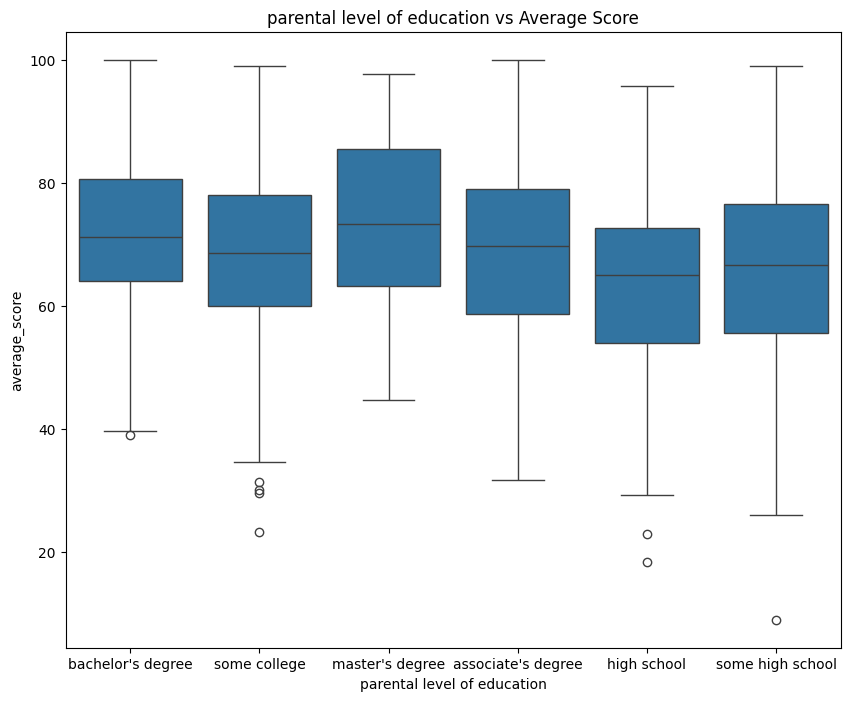

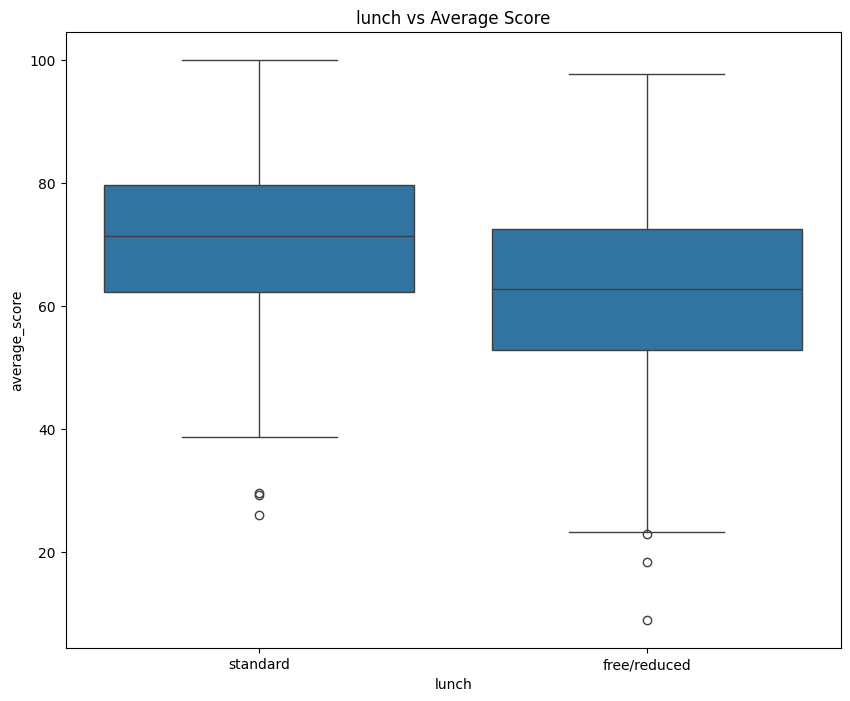

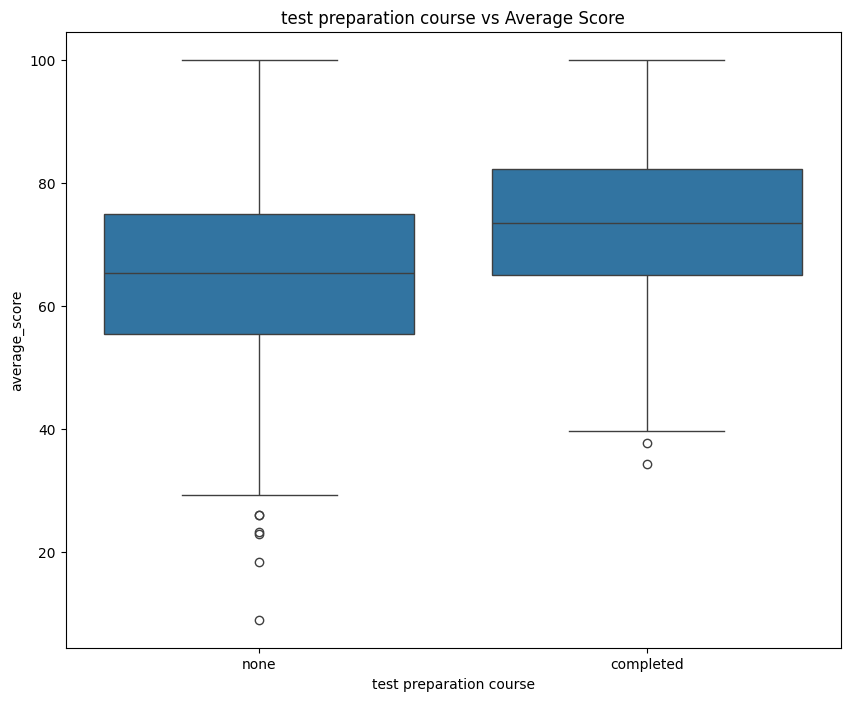

In [18]:
for col in categorical_features: 
    plt.figure(figsize=(10,8)) 
    sns.boxplot(x=col,y='average_score',data=df) 
    plt.title(f'{col} vs Average Score')
    plt.xticks() 
    plt.show()

In [19]:
for col in categorical_features:
    print(df.groupby(col)['average_score'].mean(),'\n')

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64 

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average_score, dtype: float64 

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average_score, dtype: float64 

lunch
free/reduced    62.199061
standard        70.837209
Name: average_score, dtype: float64 

test preparation course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64 



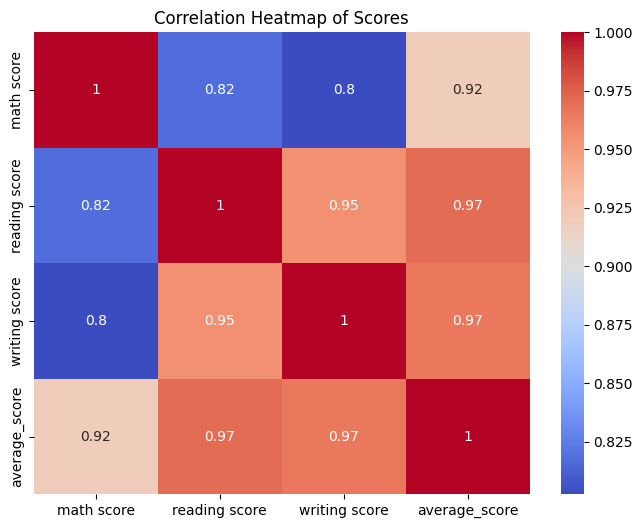

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['math score','reading score','writing score','average_score']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Scores")
plt.show()


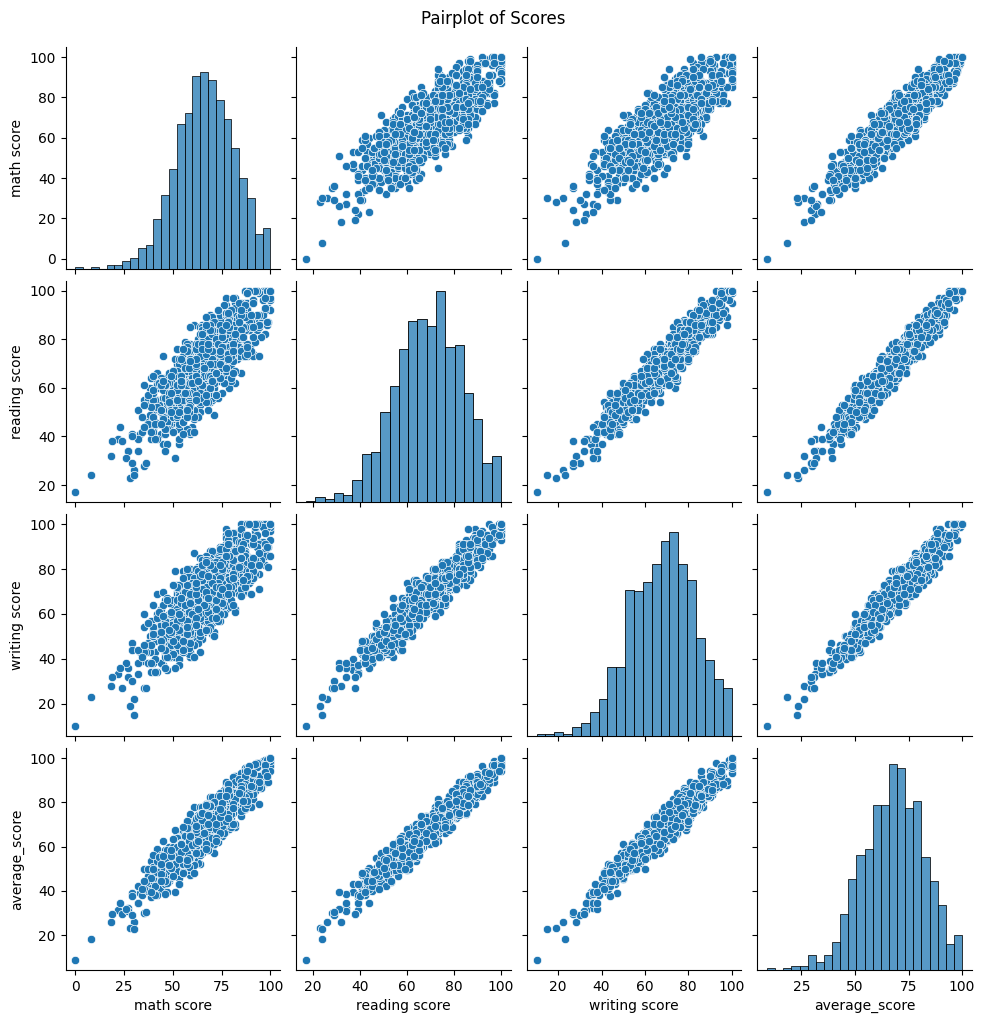

In [21]:
sns.pairplot(df[['math score','reading score','writing score','average_score']])
plt.suptitle("Pairplot of Scores",y=1.02)
plt.show()

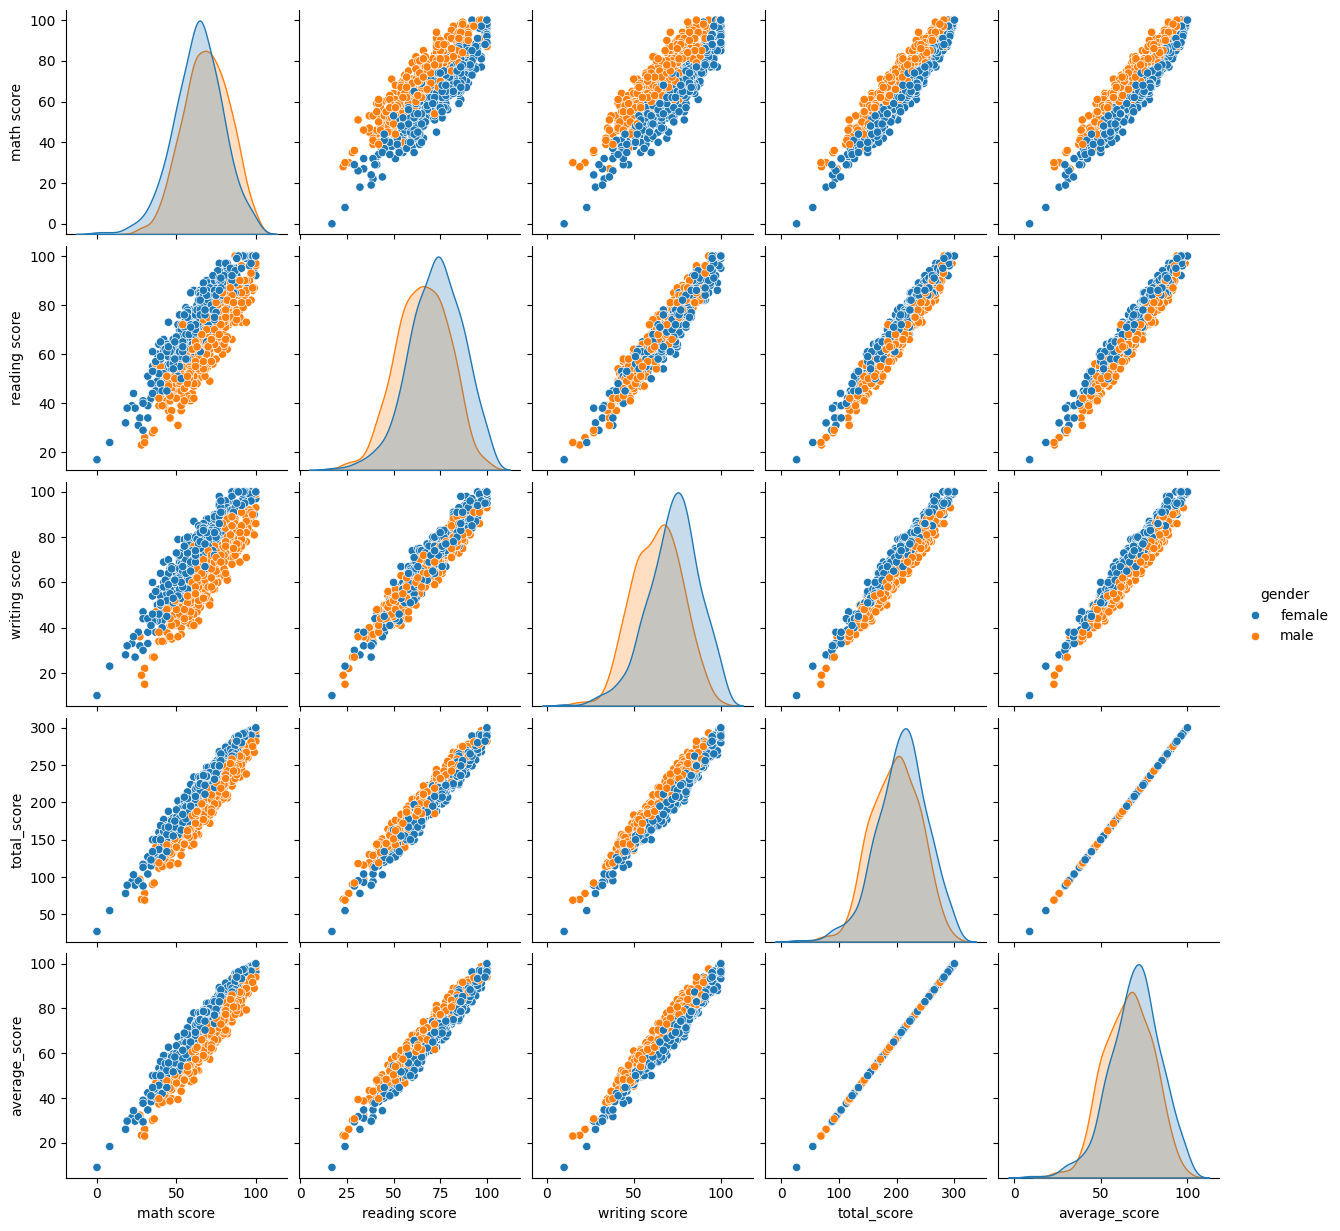

In [22]:
sns.pairplot(df,hue='gender')
plt.show()